In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from sklearn.metrics import accuracy_score

In [7]:
TRAIN_DATA_PATH = 'd:\\Projects\\hand-sign-ml\\data\\train'
TEST_DATA_PATH = 'd:\\Projects\\hand-sign-ml\\data\\test'

In [8]:
os.chdir(TRAIN_DATA_PATH)
letters  = os.listdir()

In [9]:
def seed(path):

    X_raw = []
    Y_raw = []

    for letter in letters:

        dir = path + "\\"+ letter
        letter_index = letters.index(letter)
        os.chdir(dir)
        files = os.listdir()

        for file in files:
            file_path = dir + "\\" + file
            X_raw.append(img.imread(file_path).reshape(28*28))
            Y_raw.append(letter_index)

    X = np.array(X_raw)
    Y = np.array(Y_raw).reshape(X.shape[0],1)

    return X,Y
    


In [10]:
X_train, Y_train = seed(TRAIN_DATA_PATH)
X_test, Y_test = seed(TEST_DATA_PATH)

In [11]:
tf.random.set_seed(1234) 

model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(units=640,activation="relu",name="L1"),
        Dense(units=360,activation="relu",name="L2"),
        Dense(units=180,activation="relu",name="L3"),
        Dense(units=96,activation="relu",name="L4"),
        Dense(units=56,activation="relu",name="L5"),
        Dense(units=24,activation="linear",name="L6")
    ], name = "hand_sign_model" 
)

In [12]:
model.summary()

Model: "hand_sign_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 640)            │       502,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 360)            │       230,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 180)            │        64,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 96)             │        17,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L5 (Dense)                      │ (None, 56)             │         5,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L6 (Dense)                      │ (None, 24)             │         1,368 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,316 (3.14 MB)

 Trainable params: 822,316 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,Y_train,
    epochs=40
)

Epoch 1/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 12.4758
Epoch 2/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.4606
Epoch 3/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.0167
Epoch 4/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.7845
Epoch 5/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.6132
Epoch 6/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.4610
Epoch 7/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.4261
Epoch 8/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.3686
Epoch 9/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.2523
Epoch 10/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.2751
Epoch 11/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.2427
Epoch 12/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.2014
Epoch 13/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.1677
Epoch 14/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.1187
Epoch 15/40
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms

In [14]:
def predicted_index(x):
    prediction = model.predict(x.reshape(1,28*28))
    prediction_p = tf.nn.softmax(prediction)
    return np.argmax(prediction_p)

y_predicted = list(map(predicted_index, X_test))
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [17]:
accuracy = accuracy_score(Y_test.reshape(Y_test.shape[0]),y_predicted)
print(f'Model has accuray of {100*accuracy:.2f}%')

Model has accuray of 83.13%


In [22]:
print(history.history.keys())


dict_keys(['loss'])


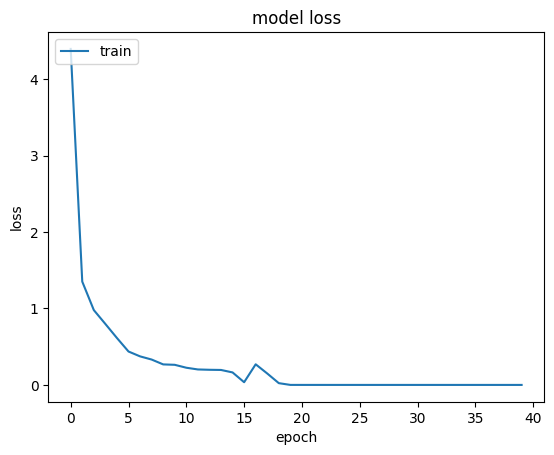

In [23]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()